In [1]:
import h5py
import scipy
import numpy as np
import torch

In [2]:
base_dir = "/home/mafzhang/code/CHLA-Imputation-and-Prediction-for-Bay/log/prediction/Chesapeake/"

In [3]:
label = np.load("/home/mafzhang/data/Chesapeake/8d/trues.npy")
label_masks = np.load("/home/mafzhang/data/Chesapeake/8d/true_masks.npy")

In [4]:
prediction_xg = np.load(base_dir+"XGBoost/with_imputation/prediction.npy", allow_pickle=True)
prediction_xg_wo = np.load(base_dir+"XGBoost/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_our = np.load(base_dir+"GraphTransformer/with_imputation/prediction.npy", allow_pickle=True)
prediction_our_wo = np.load(base_dir+"GraphTransformer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_mtgnn = np.load(base_dir+"MTGNN/with_imputation/prediction.npy", allow_pickle=True)
prediction_mtgnn_wo = np.load(base_dir+"MTGNN/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_tsmixer = np.load(base_dir+"TSMixer/with_imputation/prediction.npy", allow_pickle=True)
prediction_tsmixer_wo = np.load(base_dir+"TSMixer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_crossformer = np.load(base_dir+"CrossFormer/with_imputation/prediction.npy", allow_pickle=True)
prediction_crossformer_wo = np.load(base_dir+"CrossFormer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_iTransformer = np.load(base_dir+"iTransformer/with_imputation/prediction.npy", allow_pickle=True)
prediction_iTransformer_wo = np.load(base_dir+"iTransformer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_predrnn = np.load(base_dir+"PredRNN/with_imputation/prediction.npy", allow_pickle=True)
prediction_predrnn_wo = np.load(base_dir+"PredRNN/without_imputation/prediction_0.npy", allow_pickle=True)

In [5]:
label_masks = label_masks.squeeze()
label = label.squeeze()
label = torch.from_numpy(label)
label_masks = torch.from_numpy(label_masks)

In [7]:
prediction_our = torch.from_numpy(prediction_our).squeeze()
prediction_our_wo = torch.from_numpy(prediction_our_wo).squeeze()
prediction_xg = torch.from_numpy(prediction_xg).squeeze().median(1).values
prediction_xg_wo = torch.from_numpy(prediction_xg_wo).squeeze()
prediction_tsmixer = torch.from_numpy(prediction_tsmixer).squeeze().median(1).values
prediction_tsmixer_wo = torch.from_numpy(prediction_tsmixer_wo).squeeze()
prediction_mtgnn = torch.from_numpy(prediction_mtgnn).squeeze().median(1).values
prediction_mtgnn_wo = torch.from_numpy(prediction_mtgnn_wo).squeeze()
prediction_crossformer = torch.from_numpy(prediction_crossformer).squeeze().median(1).values
prediction_crossformer_wo = torch.from_numpy(prediction_crossformer_wo).squeeze()
prediction_iTransformer = torch.from_numpy(prediction_iTransformer).squeeze().median(1).values
prediction_iTransformer_wo = torch.from_numpy(prediction_iTransformer_wo).squeeze()
prediction_predrnn = torch.from_numpy(prediction_predrnn).squeeze().median(1).values
prediction_predrnn_wo = torch.from_numpy(prediction_predrnn_wo).squeeze()


TypeError: expected np.ndarray (got Tensor)

In [8]:
mse_our= (((prediction_our.mean(1)- label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_our))
mse_our_wo = (((prediction_our_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_our_wo))

mse_xg = (((prediction_xg - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_xg))
mse_xg_wo = (((prediction_xg_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_xg_wo))

mse_tsmixer = (((prediction_tsmixer- label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_tsmixer))
mse_tsmixer_wo = (((prediction_tsmixer_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_tsmixer_wo))

mse_crossformer = (((prediction_crossformer- label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_crossformer))
mse_crossformer_wo = (((prediction_crossformer_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_crossformer_wo))

mse_mtgnn = (((prediction_mtgnn - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_mtgnn))
mse_mtgnn_wo = (((prediction_mtgnn_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_mtgnn_wo))

mse_iTransformer = (((prediction_iTransformer - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_iTransformer))
mse_iTransformer_wo = (((prediction_iTransformer_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_iTransformer_wo))

mse_predrnn = (((prediction_predrnn - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_predrnn))
mse_predrnn_wo = (((prediction_predrnn_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_predrnn_wo))

0.03122065
0.037361868
0.04303540280785233
0.04946128989436908
0.035195194
0.051664095
0.035074595
0.051311206
0.039958682
0.051515922
0.033241503
0.052918386
0.034530744
0.03594145


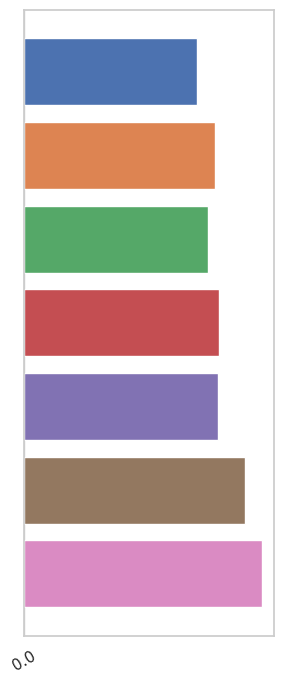

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import MultipleLocator

sns.set(style="whitegrid")
figure = plt.figure(figsize=(3,7))
ax = figure.add_subplot(111)
value = np.array([np.nanmean(mse_xg),np.nanmean(mse_mtgnn), np.nanmean(mse_crossformer), np.nanmean(mse_tsmixer), np.nanmean(mse_iTransformer), np.nanmean(mse_predrnn), np.nanmean(mse_our)])
category = np.array(['XGBoost', "MTGNN", "CrossFormer", "TSMixer", "iTransFormer", "PredRNN", "Our"])
# value = value.reshape(-1)
# category = category.T
# category = category.reshape(-1)
color= sns.color_palette()[:7]
color = color[::-1]
# plot(x=category, y=value, showfliers=False)
x_major_locator=MultipleLocator(0.1)
ax.xaxis.set_major_locator(x_major_locator)
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
plt.barh(category, value, color=color)
plt.yticks([])
plt.xticks(rotation=30)
plt.tight_layout()

In [10]:
import pandas as pd
import numpy as np
category = []
category.extend(['XGBoost' for i in range(1893)])
category.extend(['XGBoost' for i in range(1893)])
category.extend(['MTGNN' for i in range(1893)])
category.extend(['MTGNN' for i in range(1893)])
category.extend(['CrossFormer' for i in range(1893)])
category.extend(['CrossFormer' for i in range(1893)])
category.extend(['TSMixer' for i in range(1893)])
category.extend(['TSMixer' for i in range(1893)])
category.extend(['iTransformer' for i in range(1893)])
category.extend(['iTransformer' for i in range(1893)])
category.extend(['PredRNN' for i in range(1893)])
category.extend(['PredRNN' for i in range(1893)])
category.extend(['Our' for i in range(1893)])
category.extend(['Our' for i in range(1893)])
imputation = []
imputation.extend(['No' for i in range(1893)])
imputation.extend(['Yes' for i in range(1893)])
imputation.extend(['No' for i in range(1893)])
imputation.extend(['Yes' for i in range(1893)])
imputation.extend(['No' for i in range(1893)])
imputation.extend(['Yes' for i in range(1893)])
imputation.extend(['No' for i in range(1893)])
imputation.extend(['Yes' for i in range(1893)])
imputation.extend(['No' for i in range(1893)])
imputation.extend(['Yes' for i in range(1893)])
imputation.extend(['No' for i in range(1893)])
imputation.extend(['Yes' for i in range(1893)])
imputation.extend(['No' for i in range(1893)])
imputation.extend(['Yes' for i in range(1893)])
data = {'mse': np.concatenate([mse_xg_wo.numpy(), mse_xg.numpy(), mse_mtgnn_wo.numpy(), mse_mtgnn.numpy(), mse_crossformer_wo.numpy(), mse_crossformer.numpy(), mse_tsmixer_wo.numpy(), mse_tsmixer.numpy(), mse_iTransformer_wo.numpy(), mse_iTransformer.numpy(), mse_predrnn_wo.numpy(), mse_predrnn.numpy(), mse_our_wo.numpy(), mse_our.numpy()],0),
        'methods':category,
        'imputation':imputation}
data = pd.DataFrame.from_dict(data)

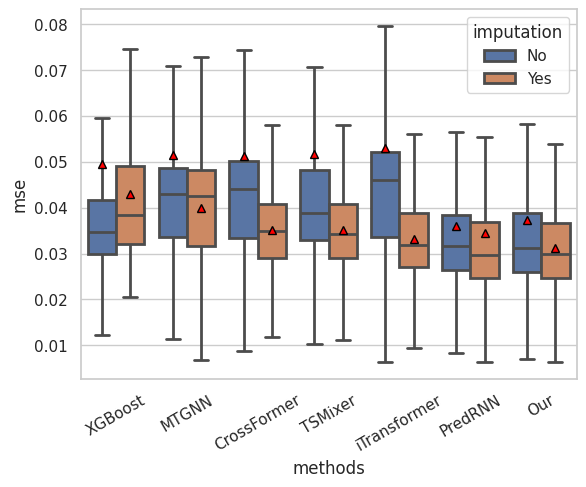

In [11]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.xticks(rotation=30)
g = sns.boxplot(x='methods', y='mse', hue='imputation', linewidth=2,showfliers=False,showmeans=True,data=data,meanprops={
                       "markerfacecolor": "red",
                       "markeredgecolor": "black",
                       "markersize": "6"})

In [12]:
mae_our= ((np.abs(prediction_our.mean(1)- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_our))
mae_our_wo = ((np.abs(prediction_our_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_our_wo))

mae_xg = ((np.abs(prediction_xg - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_xg))
mae_xg_wo = ((np.abs(prediction_xg_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_xg_wo))

mae_tsmixer = ((np.abs(prediction_tsmixer- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_tsmixer))
mae_tsmixer_wo = ((np.abs(prediction_tsmixer_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_tsmixer_wo))

mae_crossformer = ((np.abs(prediction_crossformer- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_crossformer))
mae_crossformer_wo = ((np.abs(prediction_crossformer_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_crossformer_wo))

mae_mtgnn = ((np.abs(prediction_mtgnn - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_mtgnn))
mae_mtgnn_wo = ((np.abs(prediction_mtgnn_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_mtgnn_wo))

mae_iTransformer = ((np.abs(prediction_iTransformer - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_iTransformer))
mae_iTransformer_wo = ((np.abs(prediction_iTransformer_wo- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_iTransformer_wo))

mae_predrnn = ((np.abs(prediction_predrnn - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_predrnn))
mae_predrnn_wo = ((np.abs(prediction_predrnn_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_predrnn_wo))

0.13301103
0.14293854
0.16022755321202545
0.15952552552646165
0.14120476
0.16375047
0.14169791
0.1651266
0.15232936
0.16508906
0.137922
0.16772293
0.13824873
0.14163913


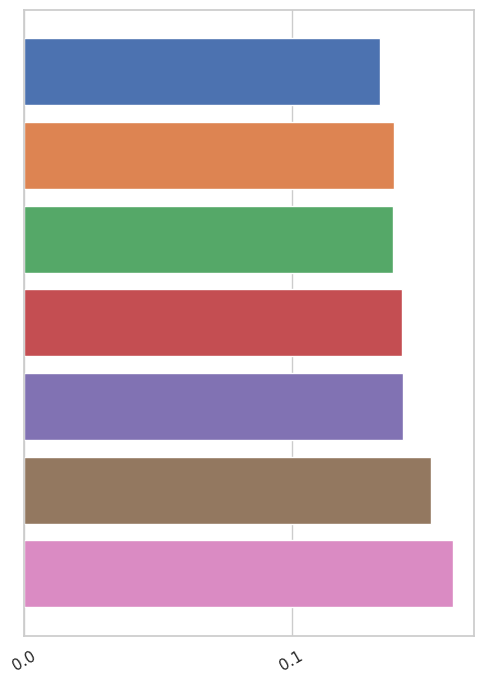

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import MultipleLocator

sns.set(style="whitegrid")
figure = plt.figure(figsize=(5,7))
ax = figure.add_subplot(111)
value = np.array([np.nanmean(mae_xg),np.nanmean(mae_mtgnn), np.nanmean(mae_crossformer), np.nanmean(mae_tsmixer), np.nanmean(mae_iTransformer), np.nanmean(mae_predrnn), np.nanmean(mae_our)])
category = np.array(['XGBoost', "MTGNN", "CrossFormer", "TSMixer", "iTransFormer", "PredRNN", "Our"])
# value = value.reshape(-1)
# category = category.T
# category = category.reshape(-1)
color= sns.color_palette()[:7]
color = color[::-1]
# plot(x=category, y=value, showfliers=False)
x_major_locator=MultipleLocator(0.1)
ax.xaxis.set_major_locator(x_major_locator)
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
plt.barh(category, value, color=color)
plt.yticks([])
plt.xticks(rotation=30)
plt.tight_layout()

In [14]:
category = []
category.extend(['XGBoost' for i in range(1893)])
category.extend(['XGBoost' for i in range(1893)])
category.extend(['MTGNN' for i in range(1893)])
category.extend(['MTGNN' for i in range(1893)])
category.extend(['CrossFormer' for i in range(1893)])
category.extend(['CrossFormer' for i in range(1893)])
category.extend(['TSMixer' for i in range(1893)])
category.extend(['TSMixer' for i in range(1893)])
category.extend(['iTransformer' for i in range(1893)])
category.extend(['iTransformer' for i in range(1893)])
category.extend(['PredRNN' for i in range(1893)])
category.extend(['PredRNN' for i in range(1893)])
category.extend(['Our' for i in range(1893)])
category.extend(['Our' for i in range(1893)])
imputation = []
imputation.extend(['No' for i in range(1893)])
imputation.extend(['Yes' for i in range(1893)])
imputation.extend(['No' for i in range(1893)])
imputation.extend(['Yes' for i in range(1893)])
imputation.extend(['No' for i in range(1893)])
imputation.extend(['Yes' for i in range(1893)])
imputation.extend(['No' for i in range(1893)])
imputation.extend(['Yes' for i in range(1893)])
imputation.extend(['No' for i in range(1893)])
imputation.extend(['Yes' for i in range(1893)])
imputation.extend(['No' for i in range(1893)])
imputation.extend(['Yes' for i in range(1893)])
imputation.extend(['No' for i in range(1893)])
imputation.extend(['Yes' for i in range(1893)])
data = {'mae': np.concatenate([mae_xg_wo.numpy(), mae_xg.numpy(), mae_mtgnn_wo.numpy(), mae_mtgnn.numpy(), mae_crossformer_wo.numpy(), mae_crossformer.numpy(), mae_tsmixer_wo.numpy(), mae_tsmixer.numpy(), mae_iTransformer_wo.numpy(), mae_iTransformer.numpy(), mae_predrnn_wo.numpy(), mae_predrnn.numpy(), mae_our_wo.numpy(), mae_our.numpy()],0),
        'methods':category,
        'imputation':imputation}
data = pd.DataFrame.from_dict(data)

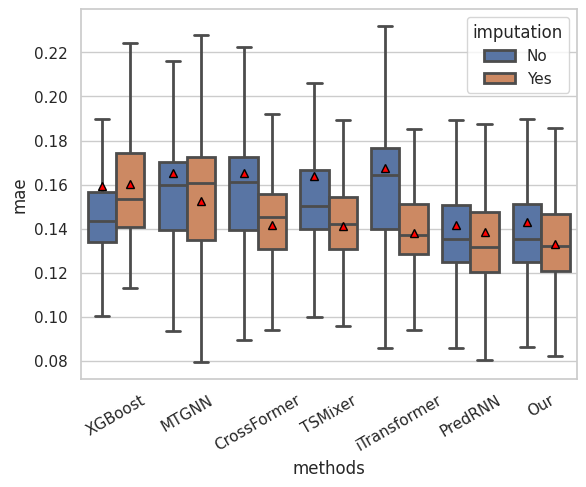

In [15]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.xticks(rotation=30)
g = sns.boxplot(x='methods', y='mae', hue='imputation', linewidth=2,showfliers=False,showmeans=True,data=data,meanprops={
                       "markerfacecolor": "red",
                       "markeredgecolor": "black",
                       "markersize": "6"})

In [17]:
# prediction_xg = np.load(base_dir+"XGBoost/with_imputation/prediction.npy", allow_pickle=True)
# prediction_xg_wo = np.load(base_dir+"XGBoost/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_our = np.load(base_dir+"GraphTransformer/with_imputation/prediction.npy", allow_pickle=True)
prediction_our_wo = np.load(base_dir+"GraphTransformer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_mtgnn = np.load(base_dir+"MTGNN/with_imputation/prediction.npy", allow_pickle=True)
prediction_mtgnn_wo = np.load(base_dir+"MTGNN/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_tsmixer = np.load(base_dir+"TSMixer/with_imputation/prediction.npy", allow_pickle=True)
prediction_tsmixer_wo = np.load(base_dir+"TSMixer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_crossformer = np.load(base_dir+"CrossFormer/with_imputation/prediction.npy", allow_pickle=True)
prediction_crossformer_wo = np.load(base_dir+"CrossFormer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_iTransformer = np.load(base_dir+"iTransformer/with_imputation/prediction.npy", allow_pickle=True)
prediction_iTransformer_wo = np.load(base_dir+"iTransformer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_predrnn = np.load(base_dir+"PredRNN/with_imputation/prediction.npy", allow_pickle=True)
prediction_predrnn_wo = np.load(base_dir+"PredRNN/without_imputation/prediction_0.npy", allow_pickle=True)

In [18]:
prediction_our = torch.from_numpy(prediction_our).squeeze()
prediction_our_wo = torch.from_numpy(prediction_our_wo).squeeze()
# prediction_xg = torch.from_numpy(prediction_xg).squeeze()
# prediction_xg_wo = torch.from_numpy(prediction_xg_wo).squeeze()
prediction_tsmixer = torch.from_numpy(prediction_tsmixer).squeeze()
prediction_tsmixer_wo = torch.from_numpy(prediction_tsmixer_wo).squeeze()
prediction_mtgnn = torch.from_numpy(prediction_mtgnn).squeeze()
prediction_mtgnn_wo = torch.from_numpy(prediction_mtgnn_wo).squeeze()
prediction_crossformer = torch.from_numpy(prediction_crossformer).squeeze()
prediction_crossformer_wo = torch.from_numpy(prediction_crossformer_wo).squeeze()
prediction_iTransformer = torch.from_numpy(prediction_iTransformer).squeeze()
prediction_iTransformer_wo = torch.from_numpy(prediction_iTransformer_wo).squeeze()
prediction_predrnn = torch.from_numpy(prediction_predrnn).squeeze()
prediction_predrnn_wo = torch.from_numpy(prediction_predrnn_wo).squeeze()

In [19]:
index = [46*i for i in range(306//46)]
prediction_our[index].shape

torch.Size([6, 10, 46, 1893])

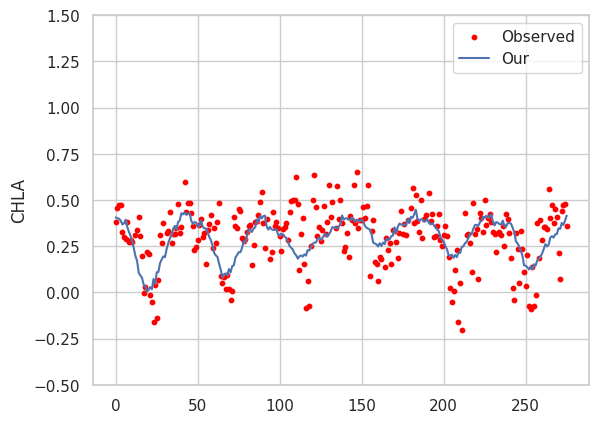

In [34]:
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
n=1400

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_our[index].transpose(1,2).reshape(276,10,1893))
predict = predict[:,:,n]
mean = predict.mean(1)
std = predict.std(1)

plt.plot(np.arange(276), mean, label="Our")
plt.fill_between(np.arange(276), mean-std, mean+std, alpha=0.3)

plt.legend()
plt.ylabel("CHLA")
plt.ylim(-0.5,1.5)
plt.show()

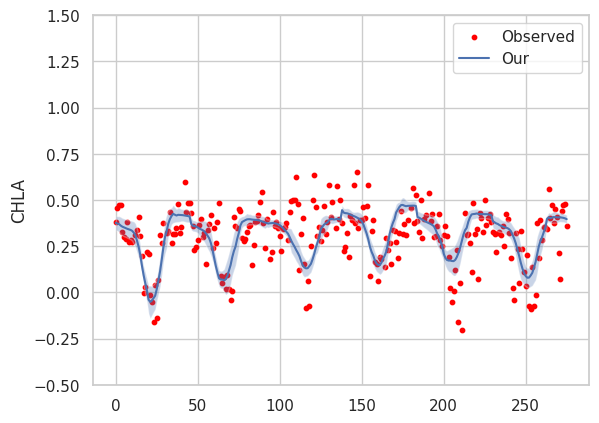

In [35]:
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
n=1400

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_predrnn[index].transpose(1,2).reshape(276,10,1893))
predict = predict[:,:,n]
mean = predict.mean(1)
std = predict.std(1)

plt.plot(np.arange(276), mean, label="Our")
plt.fill_between(np.arange(276), mean-std, mean+std, alpha=0.3)

plt.legend()
plt.ylabel("CHLA")
plt.ylim(-0.5,1.5)
plt.show()

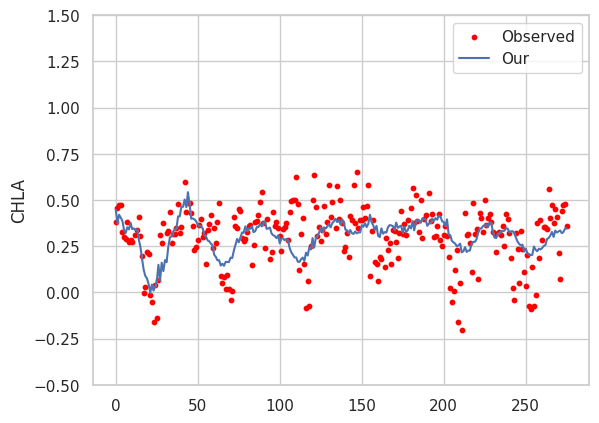

In [36]:
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
n=1400

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_tsmixer[index].transpose(1,2).reshape(276,10,1893))
predict = predict[:,:,n]
mean = predict.mean(1)
std = predict.std(1)

plt.plot(np.arange(276), mean, label="Our")
plt.fill_between(np.arange(276), mean-std, mean+std, alpha=0.3)

plt.legend()
plt.ylabel("CHLA")
plt.ylim(-0.5,1.5)
plt.show()

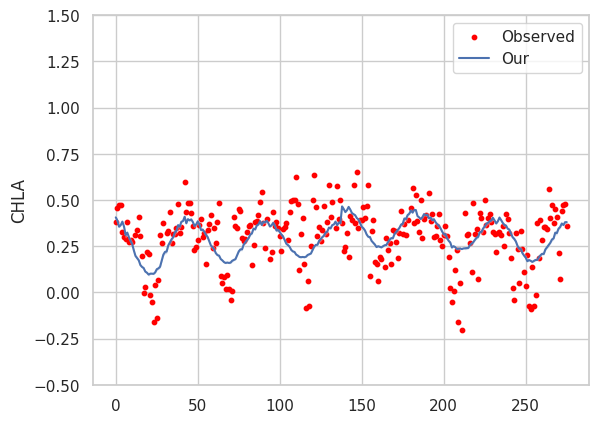

In [37]:
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
n=1400

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_iTransformer[index].transpose(1,2).reshape(276,10,1893))
predict = predict[:,:,n]
mean = predict.mean(1)
std = predict.std(1)

plt.plot(np.arange(276), mean, label="Our")
plt.fill_between(np.arange(276), mean-std, mean+std, alpha=0.3)

plt.legend()
plt.ylabel("CHLA")
plt.ylim(-0.5,1.5)
plt.show()

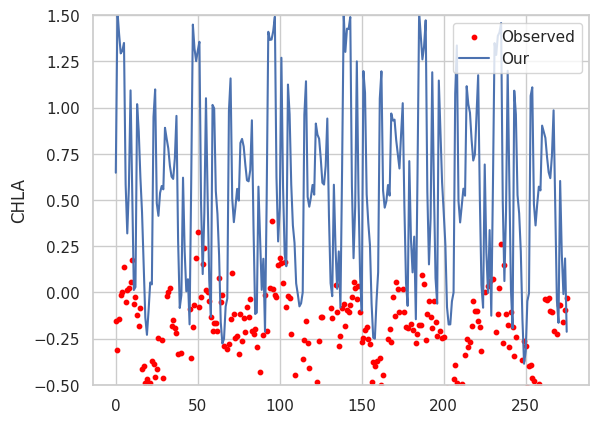

In [25]:
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
n= 1500

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_our_wo[index].transpose(1,2).reshape(276,1,1893))
predict = predict[:,:,n]
# mean = predict.mean(1)
# std = predict.std(1)

plt.plot(np.arange(276), predict, label="Our")
# plt.fill_between(np.arange(276), mean-3*std, mean+3*std, alpha=0.3)

plt.legend()
plt.ylabel("CHLA")
plt.ylim(-0.5,1.5)
plt.show()

torch.Size([276, 10, 2907])


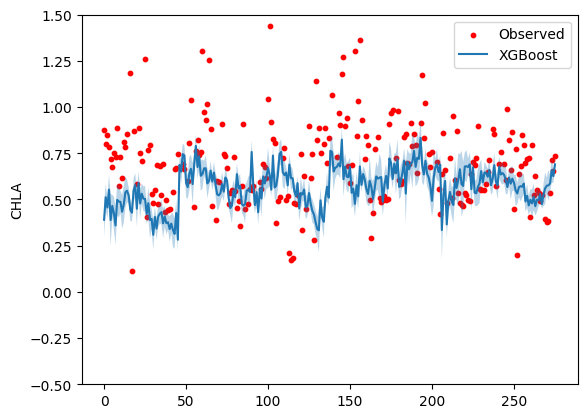

In [46]:
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
n= 500

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_xg[index].transpose(1,2).reshape(276,10,2907))
print(predict.shape)
predict = predict[:,:,n]
mean = predict.mean(1)
std = predict.std(1)

plt.plot(np.arange(276), mean, label="XGBoost")
plt.fill_between(np.arange(276), mean-std, mean+std, alpha=0.3)

plt.legend()
plt.ylabel("CHLA")
plt.ylim(-0.5,1.5)
plt.show()

torch.Size([276, 10, 2907])


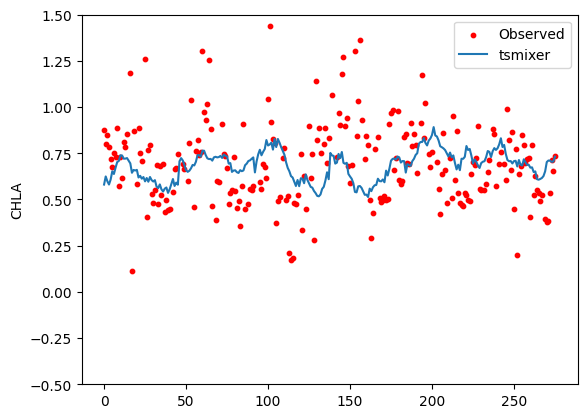

In [28]:
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
n= 500

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_tsmixer[index].transpose(1,2).reshape(276,10,2907))
print(predict.shape)
predict = predict[:,:,n]
mean = predict.mean(1)
std = predict.std(1)

plt.plot(np.arange(276), mean, label="tsmixer")
plt.fill_between(np.arange(276), mean-std, mean+std, alpha=0.3)

plt.legend()
plt.ylabel("CHLA")
plt.ylim(-0.5,1.5)
plt.show()